# An Initial Exploration of LIV + UV KASH cells image analysis

In [ ]:
data_analysis.ipynb

## Data Loading and Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as stats

In [2]:
# Specify the file path
file_path = 'D:\\BioLab\\src_3D_signal_detection\\afilament\\analysis_data\\cell_stat.csv'

# Load the CSV file into a pandas DataFrame, skipping blank lines
data = pd.read_csv(file_path, skip_blank_lines=True)

# Drop rows with missing values
data = data.dropna()

# Parse the 'Image_name' column and create new columns
def parse_image_name(image_name):
    parts = image_name.split()

    # Parse Date
    date = parts[0]

    # Parse Doxy
    doxy = 'KASH+doxy' in image_name

    # Parse LIV
    liv = '+LIV' in image_name
    # Assuming that if it's not '+LIV', it's '-LIV', so no need to check for '-LIV' explicitly

    # Parse Time Point
    time_point = None
    for part in parts:
        if 'hr' in part:
            # Extracting numeric portion and converting to integer
            time_point = int(re.search(r'\d+', part).group())
            break

    return pd.Series({'Date': date, 'Doxy': doxy, 'LIV': liv, 'Time point': time_point})


# Apply the parsing function to each image name
new_columns = data['Image_name'].apply(parse_image_name)

# Insert new columns next to the 'Image_name' column
col_location = data.columns.get_loc('Image_name') + 1
for i, col_name in enumerate(new_columns.columns):
    data.insert(col_location + i, col_name, new_columns[col_name])



In [3]:
data

,Image_name,Date,Doxy,LIV,Time point,Img_num,Cell_num,"Nucleus_volume, cubic_micrometre","Nucleus_length, micrometre","Nucleus_width, micrometre","Nucleus_high, micrometre",Cy5-T1 av_signal_in_nuc_area_3D,Cy5-T1 has ring,Cy5-T1 ring intensity coef,AF594-T2 av_signal_in_nuc_area_3D,AF594-T2 has ring,AF594-T2 ring intensity coef,AF488-T3 av_signal_in_nuc_area_3D,AF488-T3 has ring,AF488-T3 ring intensity coef
0,23-4-21 KASH 12J +LIV 0hr-01.czi,23-4-21,False,True,0,0,0,764.157151,18.796179,16.925067,4.60,13612.541200,False,0.509785,209.762449,False,0.849104,2257.782350,False,0.573698
1,23-4-21 KASH 12J +LIV 0hr-01.czi,23-4-21,False,True,0,0,1,2578.828240,30.022857,24.409518,6.21,17065.059347,False,0.488198,196.548785,False,0.751875,1969.780082,False,0.601989
2,23-4-21 KASH 12J +LIV 0hr-01.czi,23-4-21,False,True,0,0,2,711.285523,18.711129,18.030724,5.06,11327.406604,False,0.487997,151.965320,False,0.784890,1667.687263,False,0.538774
3,23-4-21 KASH 12J +LIV 0hr-01.czi,23-4-21,False,True,0,0,3,774.482250,20.752343,20.667292,5.06,7960.245725,False,0.487750,122.598333,False,0.811979,1493.734179,False,0.523470
4,23-4-21 KASH 12J +LIV 0hr-01.czi,23-4-21,False,True,0,0,4,826.936281,19.306483,19.136382,4.14,14659.917152,False,0.525452,198.611614,False,0.752241,3175.753725,False,0.576622
5,23-4-21 KASH 12J +LIV 0hr-01.czi,23-4-21,False,True,0,0,5,1231.609953,18.796179,20.497191,7.13,15559.487930,False,0.454788,160.119151,False,0.682869,1857.847746,False,0.521272
6,23-4-21 KASH 12J +LIV 24hr-05.czi,23-4-21,False,True,24,1,0,1264.664911,24.834771,21.177596,5.06,14082.957013,False,0.436943,174.132333,False,0.685065,1868.168490,False,0.616833
7,23-4-21 KASH 12J +LIV 24hr-05.czi,23-4-21,False,True,24,1,1,1299.850273,24.494569,23.303860,5.06,14019.732249,False,0.471833,188.426159,False,0.759167,1733.283863,False,0.639691
8,23-4-21 KASH 12J +LIV 24hr-05.czi,23-4-21,False,True,24,1,2,886.367991,21.858001,20.497191,4.37,11579.453402,False,0.520608,166.347841,False,0.741827,1859.345744,False,0.569557
9,23-4-21 KASH 12J +LIV 24hr-05.czi,23-4-21,False,True,24,1,3,630.279415,22.793557,16.669915,4.83,9160.624497,False,0.359957,120.035988,False,0.618905,1356.123643,False,0.407687


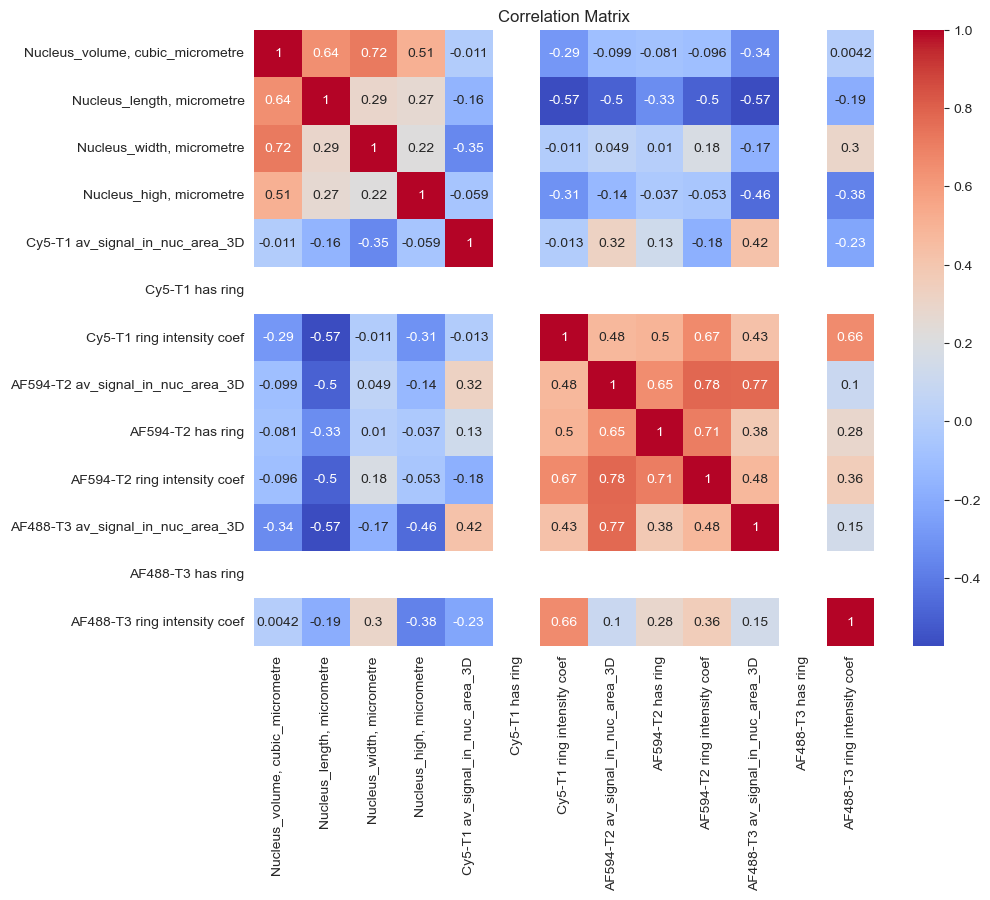

In [4]:
# Drop columns not needed in correlation matrix
columns_to_drop = ["Doxy", "LIV", "Time point", "Img_num", "Cell_num"]
data_for_correlation = data.drop(columns=columns_to_drop)

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()


# Plot the triangular heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Create new column for grouping based on LIV and Doxy
data['Group'] = data.apply(lambda x: f"{'+' if x['Doxy'] else '-'}Doxy {'+' if x['LIV'] else '-'}LIV", axis=1)

In [6]:
data['Group']

0     -Doxy +LIV
1     -Doxy +LIV
2     -Doxy +LIV
3     -Doxy +LIV
4     -Doxy +LIV
5     -Doxy +LIV
6     -Doxy +LIV
7     -Doxy +LIV
8     -Doxy +LIV
9     -Doxy +LIV
10    -Doxy +LIV
11    -Doxy +LIV
12    -Doxy +LIV
13    -Doxy +LIV
14    -Doxy +LIV
15    -Doxy +LIV
16    -Doxy +LIV
17    -Doxy +LIV
18    +Doxy -LIV
19    +Doxy -LIV
20    +Doxy -LIV
21    +Doxy -LIV
22    +Doxy -LIV
23    +Doxy -LIV
24    +Doxy -LIV
25    +Doxy -LIV
26    +Doxy -LIV
27    +Doxy -LIV
28    +Doxy -LIV
29    +Doxy -LIV
30    +Doxy -LIV
31    +Doxy -LIV
32    +Doxy -LIV
33    +Doxy -LIV
34    +Doxy -LIV
35    +Doxy -LIV
36    +Doxy -LIV
37    +Doxy -LIV
38    +Doxy -LIV
39    +Doxy -LIV
40    +Doxy -LIV
41    +Doxy -LIV
42    +Doxy -LIV
43    +Doxy -LIV
44    +Doxy -LIV
45    +Doxy -LIV
46    +Doxy -LIV
47    +Doxy -LIV
48    +Doxy -LIV
49    +Doxy -LIV
50    +Doxy -LIV
51    +Doxy -LIV
52    +Doxy -LIV
53    +Doxy -LIV
54    +Doxy -LIV
55    +Doxy -LIV
56    +Doxy -LIV
57    +Doxy -LIV
Name: Group, d

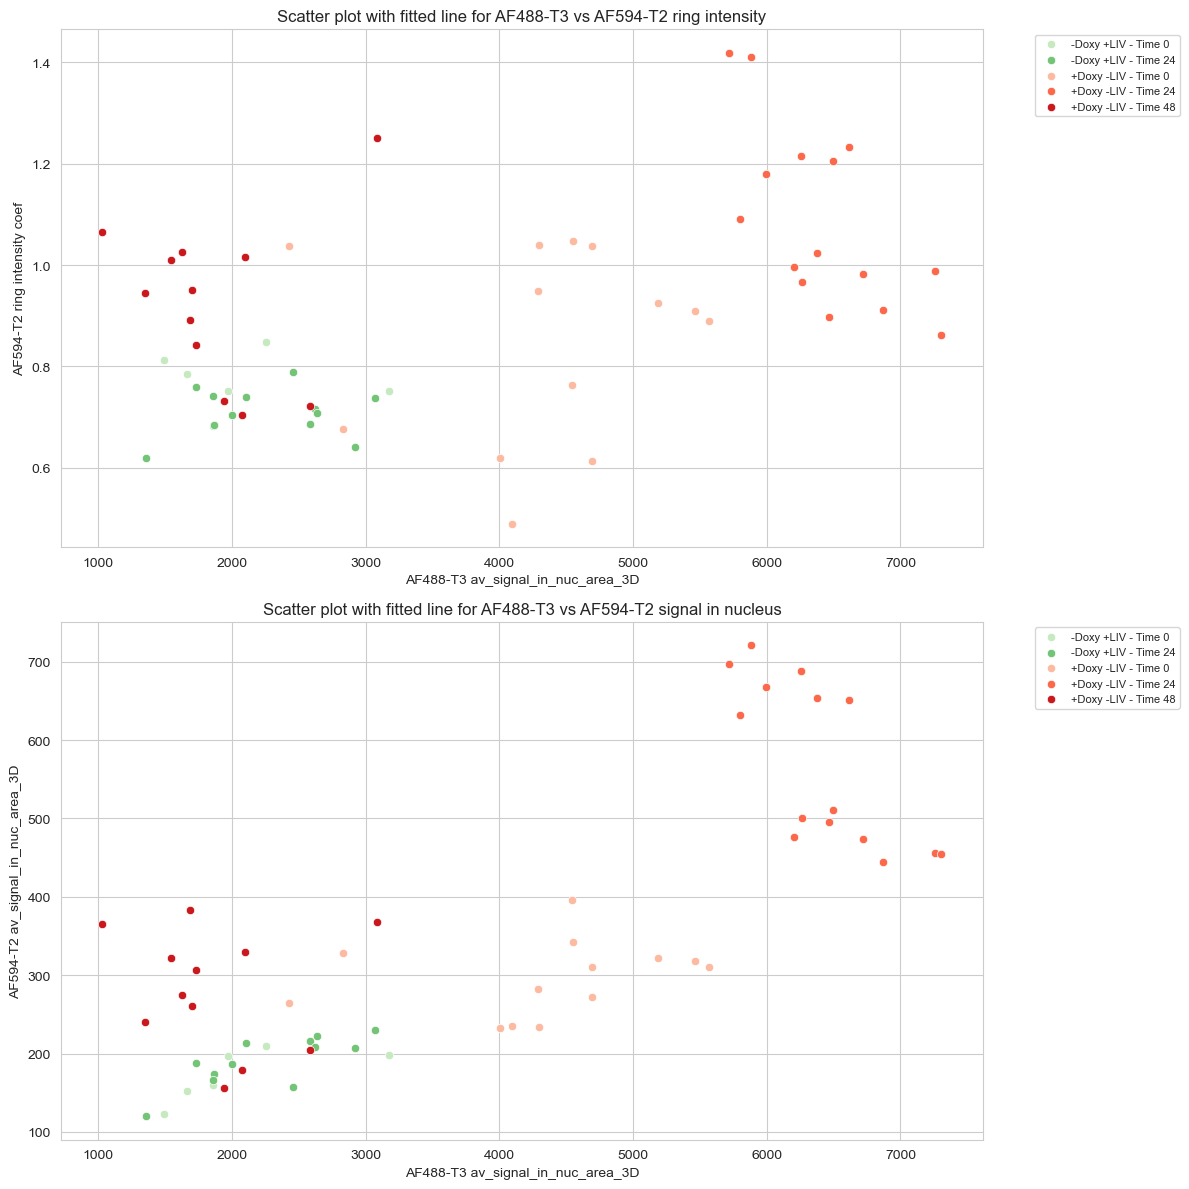

In [7]:
# Creating two subplots side by side
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Define color palettes
color_palettes = {
    '-Doxy -LIV': sns.color_palette("Blues", 3),
    '+Doxy +LIV': sns.color_palette("Oranges", 3),
    '-Doxy +LIV': sns.color_palette("Greens", 3),
    '+Doxy -LIV': sns.color_palette("Reds", 3),
}

# Define time points
time_points = [0, 24, 48]

# Loop through groups
groups = ['-Doxy -LIV', '+Doxy +LIV', '-Doxy +LIV', '+Doxy -LIV']
for idx, group in enumerate(groups):
    group_data = data[data['Group'] == group]

    # Loop through time points
    for i, tp in enumerate(time_points):
        plot_data = group_data[group_data['Time point'] == tp]
        color = color_palettes[group][i]

        # Plotting on the first axes
        sns.scatterplot(x=plot_data["AF488-T3 av_signal_in_nuc_area_3D"], y=plot_data["AF594-T2 ring intensity coef"], label=f'{group} - Time {tp}', ax=axes[0], color=color)

        # Plotting on the second axes
        sns.scatterplot(x=plot_data["AF488-T3 av_signal_in_nuc_area_3D"], y=plot_data["AF594-T2 av_signal_in_nuc_area_3D"], label=f'{group} - Time {tp}', ax=axes[1], color=color)


# Add labels
axes[0].set_xlabel('AF488-T3 av_signal_in_nuc_area_3D')
axes[0].set_ylabel('AF594-T2 ring intensity coef')
axes[0].set_title('Scatter plot with fitted line for AF488-T3 vs AF594-T2 ring intensity')

axes[1].set_xlabel('AF488-T3 av_signal_in_nuc_area_3D')
axes[1].set_ylabel('AF594-T2 av_signal_in_nuc_area_3D')
axes[1].set_title('Scatter plot with fitted line for AF488-T3 vs AF594-T2 signal in nucleus')

# Display legend
axes[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)
axes[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


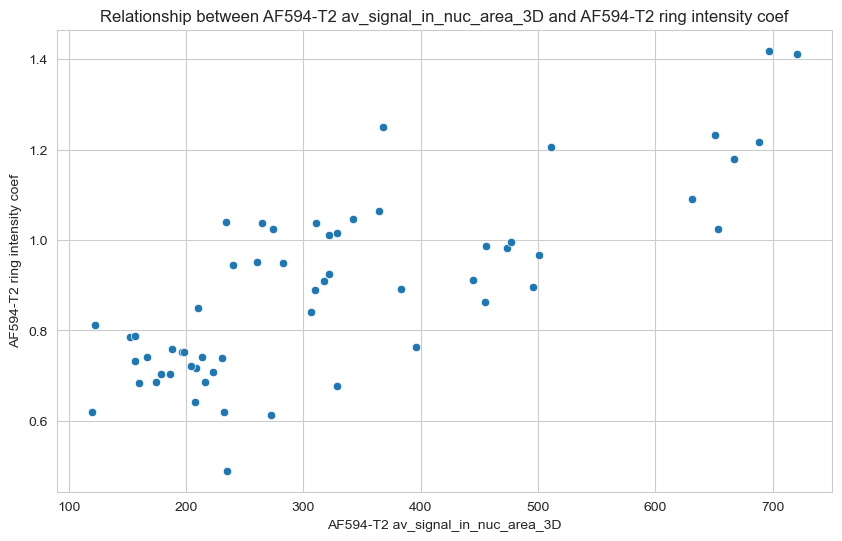

In [10]:
# Plot a scatter plot to show the relationship between the two columns
data['corrected AF594-T2 ring intensity coef'] = data["AF594-T2 ring intensity coef"]/data["Cy5-T1 ring intensity coef"]
plt.figure(figsize=(10,6))
sns.scatterplot(x = "AF594-T2 av_signal_in_nuc_area_3D",
                y = "AF594-T2 ring intensity coef",
                data = data)

# Set labels and title for the plot
plt.xlabel("AF594-T2 av_signal_in_nuc_area_3D")
plt.ylabel("AF594-T2 ring intensity coef")
plt.title("Relationship between AF594-T2 av_signal_in_nuc_area_3D and AF594-T2 ring intensity coef")

# Show the plot
plt.show()